### **NOTES**


Exercício de ML, aplicação de modelo de Decision Trees e Random Forests

_Análise de perfil de cliente para concessão de crédito financeiro (score, probabilidade de pagamento, risco de default...)_

Para este exercício, vamos explorar dados disponíveis publicamente de [LendingClub.com](www.lendingclub.com). Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que têm dinheiro (investidores). Felizmente, como investidor, você gostaria de investir em pessoas que mostraram um perfil de ter uma alta probabilidade de pagá-lo de volta. Vamos tentar criar um modelo que ajude a prever isso. Utilizaremos os dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o mutuário pagou o empréstimo na íntegra.

Aqui estão o que as colunas representam:
* credit.policy: 1-o cliente atende aos critérios de subscrição de crédito da LendingClub.com; 0-o contrário.
* purpose: o objetivo do empréstimo (possíveis valores "credit_card", "debt_consolidation", "educacional", "major_purchase", "small_business" e "all_other").
* int.rate: a taxa de juros do empréstimo (uma taxa de 11% seria armazenada como 0.11). Quanto mais arriscado o perfil julgado por LendingClub.com, maior a taxa de juros.
* installment: as parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* log.annual.inc: o log natural da renda anual auto-relatada do mutuário.
(log natural: tentar aproximar a distribuição de valores, "achatando-os")
* dti: ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual).
* fico: a pontuação de crédito FICO do mutuário.
* days.with.cr.line: o número de dias em que o mutuário teve uma linha de crédito.
(em vezes anteriores)
* revol.bal: saldo rotativo do mutuário (montante não pago no final do ciclo de cobrança do cartão de crédito).
* revol.util: taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).
* inq.last.6mths: número de consultas do mutuário por credores nos últimos 6 meses.
* delinq.2yrs: o número de vezes que o mutuário havia passado mais de 30 dias em um pagamento nos últimos 2 anos.
* pub.rec: o número de registros públicos depreciativos do mutuário (arquivamentos de falências, ônus fiscais ou julgamentos).

---

### **INITIAL IMPORTS**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')


---

### **FUNCTIONS**

---

### **CLEANING / EDA**

_Boa Prática:_

- data -> fica somente p/ consulta

- alterações, criação de novas series -> add em novos data frames

In [4]:
#carregamento de dados
data = pd.read_csv('./loan_data.csv')


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
data.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
data.describe()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


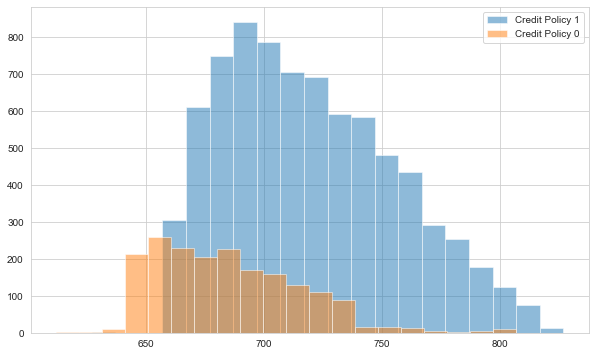

In [8]:
plt.figure(figsize=(10, 6))
data[data['credit.policy'] == 1]['fico'].hist(alpha=0.5, bins=20, label='Credit Policy 1')
data[data['credit.policy'] == 0]['fico'].hist(alpha=0.5, bins=20, label='Credit Policy 0')
plt.legend();

#existem pessoas que apesar do fico alto (acima de 750), não receberam aprovação p/ crédito


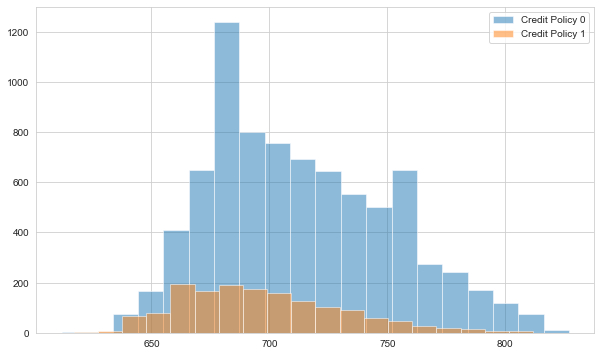

In [9]:
plt.figure(figsize=(10, 6))
data[data['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, bins=20, label='Credit Policy 0')
data[data['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, bins=20, label='Credit Policy 1')
plt.legend();

#not.fully.paid -> crédito que não foi totalmente quitado
#0 -> falso, ou seja, foi totalmente quitado
#1 -> verdadeiro, ou seja, não foi totalmente quitado


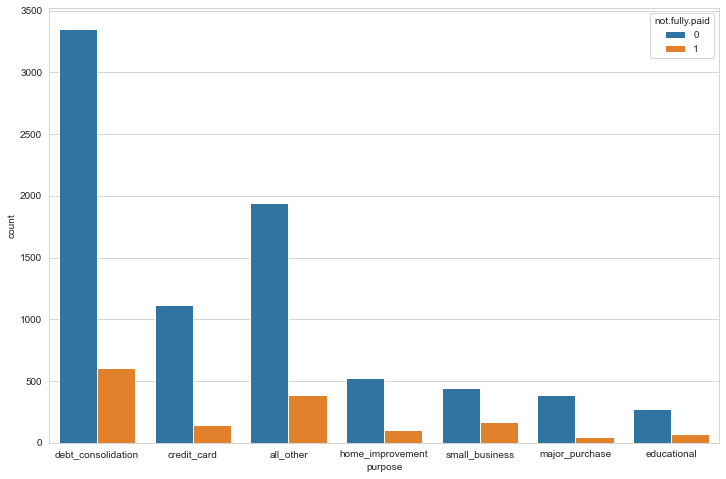

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='purpose', hue='not.fully.paid');


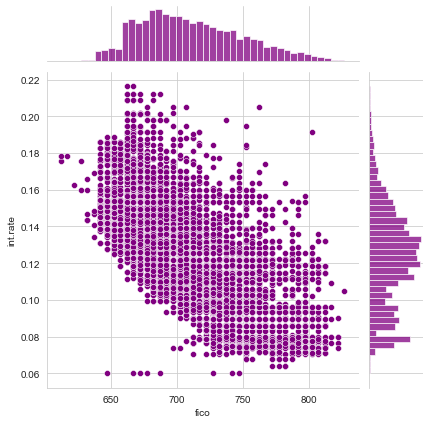

In [11]:
sns.jointplot(data=data, x='fico', y='int.rate', color='purple');

#tem uma tendência: qto maior o fico, menor a taxa de juros
#(alguns outliers)


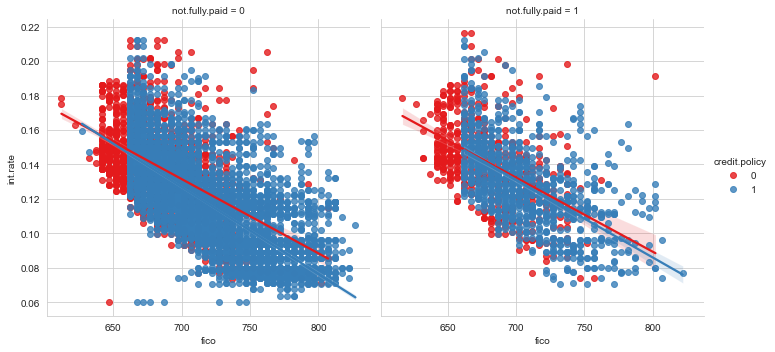

In [12]:
sns.lmplot(data=data, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set1');

#fico, int rate, not fully paid, credit policy
#4 variáveis


In [13]:
data['purpose'].value_counts()


debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [14]:
#coluna 'purpose' tem 7 valores string possíveis
#vale a pena converter em dummies

cat_features = ['purpose']


In [15]:
df = pd.get_dummies(data=data, columns=cat_features, drop_first=True, prefix='pur')


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   credit.policy           9578 non-null   int64  
 1   int.rate                9578 non-null   float64
 2   installment             9578 non-null   float64
 3   log.annual.inc          9578 non-null   float64
 4   dti                     9578 non-null   float64
 5   fico                    9578 non-null   int64  
 6   days.with.cr.line       9578 non-null   float64
 7   revol.bal               9578 non-null   int64  
 8   revol.util              9578 non-null   float64
 9   inq.last.6mths          9578 non-null   int64  
 10  delinq.2yrs             9578 non-null   int64  
 11  pub.rec                 9578 non-null   int64  
 12  not.fully.paid          9578 non-null   int64  
 13  pur_credit_card         9578 non-null   uint8  
 14  pur_debt_consolidation  9578 non-null   

----

### **TRAIN / TEST**

In [17]:
#separando os dados de treino e teste
from sklearn.model_selection import train_test_split


In [18]:
x = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)


Treino

In [31]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
d_tree_clf = DecisionTreeClassifier()
d_tree_clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [37]:
#random forest
from sklearn.ensemble import RandomForestClassifier
r_forest_clf = RandomForestClassifier(n_estimators=200)
r_forest_clf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=200)

Teste

In [33]:
#decision tree
d_tree_predict = d_tree_clf.predict(x_test)


In [38]:
#random forest
r_forest_predict = r_forest_clf.predict(x_test)


----

### **MODEL EVALUATION**

In [26]:
from sklearn.metrics import classification_report, confusion_matrix


In [35]:
#decision tree
print(classification_report(y_test, d_tree_predict))


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [36]:
#decision tree
print(confusion_matrix(y_test, d_tree_predict))


[[1996  435]
 [ 342  101]]


In [39]:
#random forest
print(classification_report(y_test, r_forest_predict))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [40]:
#random forest
print(confusion_matrix(y_test, r_forest_predict))


[[2424    7]
 [ 433   10]]


----

### **CONCLUSIONS**

**_Decision Tree Classifier:_**

-Em relação à mutuários que pagaram o financiamento, obteve-se precisão de 0.85; para mutuários que não pagaram o financiamento, obteve-se precisão de 0.19

Confusion Matrix:

linhas: indica o que o modelo previu

colunas: o que aconteceu de fato


                    0               1
                    pagou           ñ pagou

    *pagou          1996            435

    *ñ pagou        342             101
    
    
    *predição do modelo

(Para o objetivo de descobrir o percentual de pessoas propensas a não pagar o financiamento, Decision Tree apresentou precisão baixa)

**_Random Forest Classifier:_**

-Em relação à mutuários que pagaram o financiamento, obteve-se precisão de 0.85; para mutuários que não pagaram o financiamento, obteve-se precisão de 0.59

Confusion Matrix:

linhas: indica o que o modelo previu

colunas: o que aconteceu de fato


                    0               1
                    pagou           ñ pagou

    *pagou          2424            7

    *ñ pagou        433             10
    
    
    *predição do modelo

(Random Forest predisse que quase todos pagaram)

(No recall, Random Forest previu que 2% não pagaram o financiamento, enquanto que Decision Tree previu que 23% não pagaram)

Os dois modelos não performaram bem, não apresentaram resultados convincentes

----

### **SKETCHES**

In [ ]:
#data.info()    #data.head()   #data.tail()  #data.columns
#data[''].unique()  #data.isnull().sum()  #data[''].value_counts()
#data.describe()


In [ ]:
#sns.histplot(data=df_clean, x=);
#sns.displot(df_clean[column_x], kde=True)
#sns.pairplot(df_clean, hue='');
#sns.jointplot(data=df_clean, x=, y=, kind='', color='');
#sns.countplot(data=df_clean, x=, hue='')
#sns.lmplot(data=df_clean, x=, y=)


In [ ]:
#plt.figure(figsize=(10, 6))
#data[data[''] == ][''].hist(alpha=0.5, bins=20, label='')
#data[data[''] == ][''].hist(alpha=0.5, bins=20, label='')
#plt.legend();


In [ ]:
#plt.figure(figsize=(12, 8))
#sns.countplot(data=, x='', hue='');


In [ ]:
#fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
#plt.xlabel('')
#plt.ylabel('')
#sns.scatterplot(x=y_test, y=predictions, ax=ax);


In [ ]:
#fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
#sns.histplot((y_test - predictions), kde=True);


Confusion Matrix:

linhas: indica o que o modelo previu

colunas: o que aconteceu de fato




                    0               1
                    ñ clicou        clicou

    *ñ clicou       156             6

    *clicou         25              143


*predição do modelo

----

### **END**